In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [2]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Data Read

In [3]:
path = '..\data\car data.csv'

In [4]:
df = pd.read_csv(path)
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [5]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_features

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [7]:
for feature in cat_features:
    print(f'Categorical features : {feature} {len(df[feature].unique())}')

Categorical features : Car_Name 98
Categorical features : Fuel_Type 3
Categorical features : Seller_Type 2
Categorical features : Transmission 2


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df_bkup = df.copy()

## Find No. Of Years based on Car Manufaturing Year


In [11]:
df = df.assign(No_Of_Years = lambda x: 2021 - x.Year)
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8


In [12]:
final_df = df.iloc[:,1:]
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [13]:
final_df.drop(columns=['Year'], inplace=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## One Hot encode the Categorical features

In [14]:
final_df  = pd.get_dummies(final_df, drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


## Plot Data

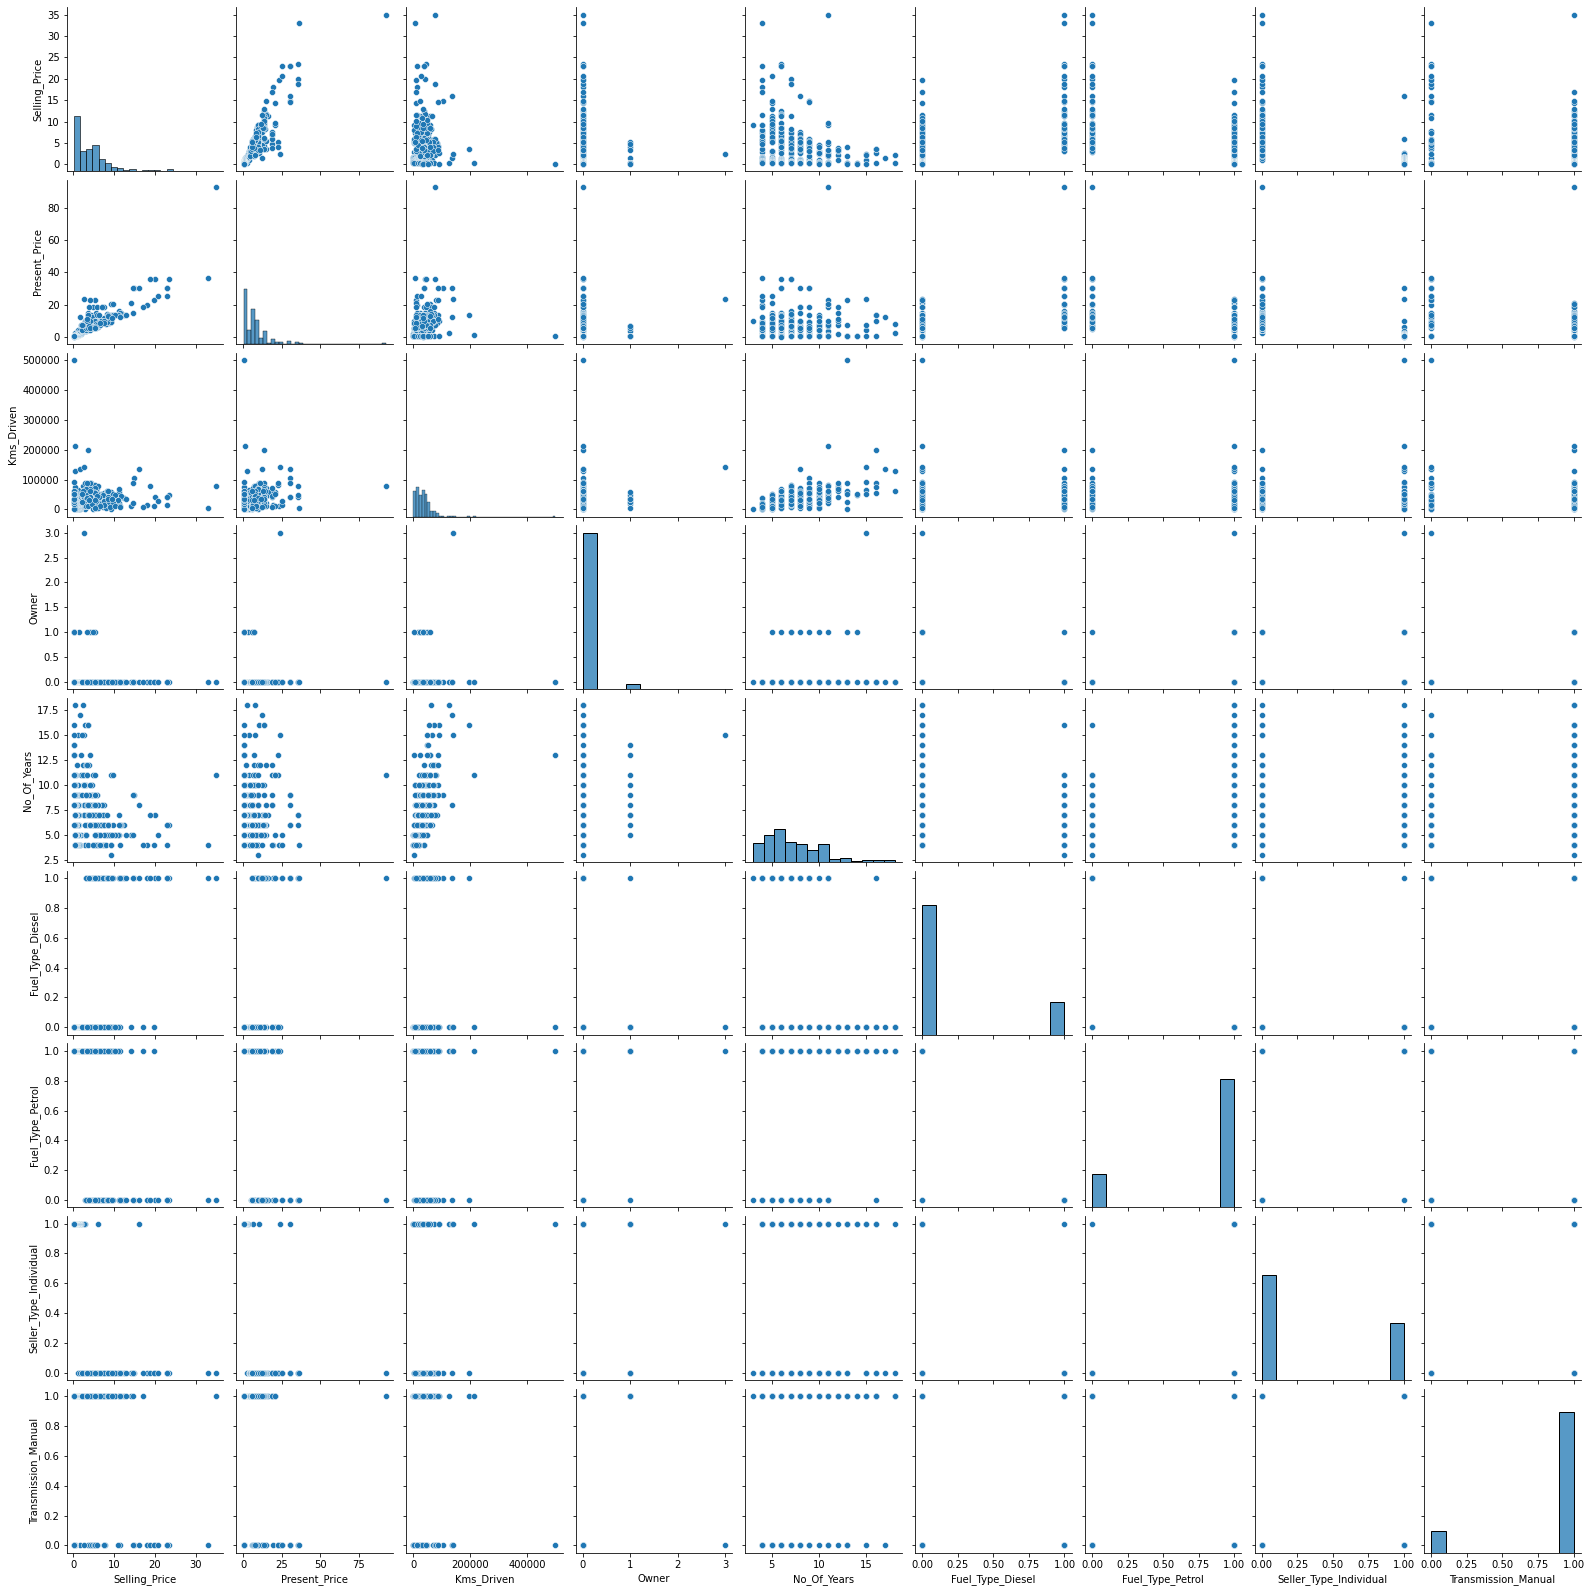

In [15]:
sns.pairplot(final_df)

## Heatmap

In [16]:
corr_mat  =final_df.corr()
corr_mat

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [17]:
top_corr_features = corr_mat.index
top_corr_features

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_Of_Years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

<AxesSubplot:>

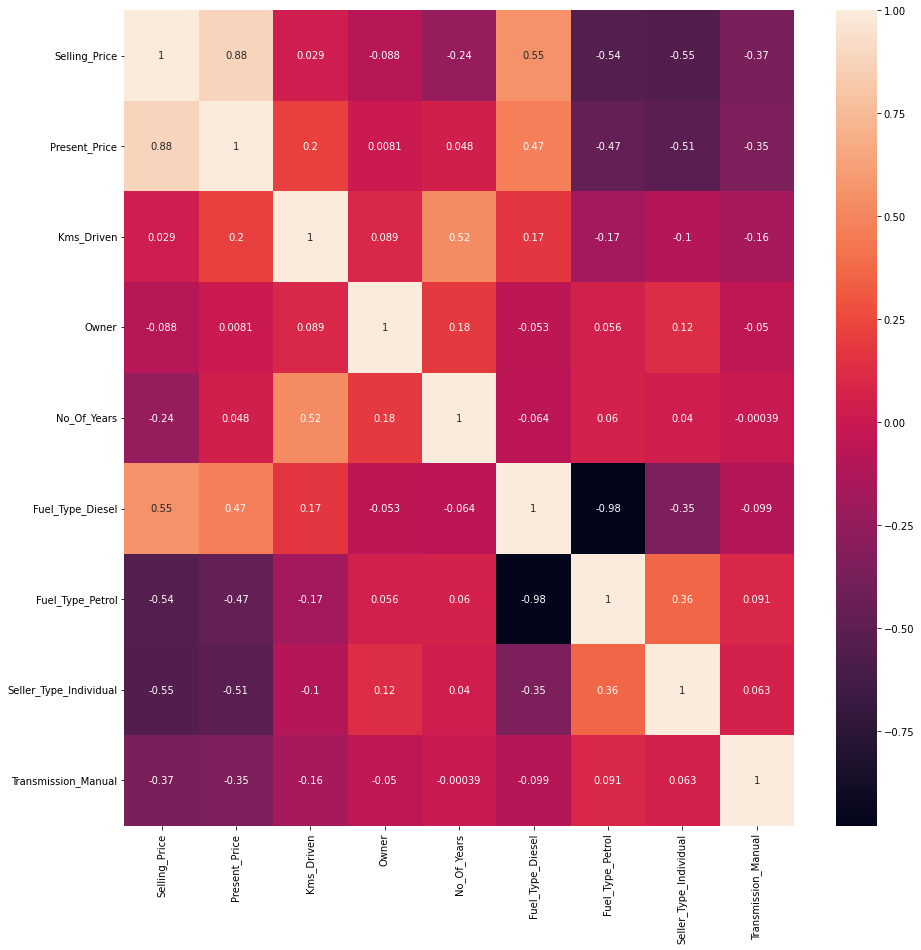

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, annot=True)

# Split Data

In [19]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


### Selling Price is our Target Variable

In [20]:
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [21]:
X.head()

,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# Feature Importance

In [23]:
etr = ExtraTreesRegressor()
etr.fit(X, y)

ExtraTreesRegressor()

In [24]:
etr.feature_importances_

array([3.71643705e-01, 4.06154518e-02, 3.45370252e-04, 7.34746849e-02,
       2.25864268e-01, 1.21041968e-02, 1.28171114e-01, 1.47781209e-01])

In [25]:
feature_imp = pd.Series(etr.feature_importances_, index = X.columns)
feature_imp

Present_Price             0.371644
Kms_Driven                0.040615
Owner                     0.000345
No_Of_Years               0.073475
Fuel_Type_Diesel          0.225864
Fuel_Type_Petrol          0.012104
Seller_Type_Individual    0.128171
Transmission_Manual       0.147781
dtype: float64

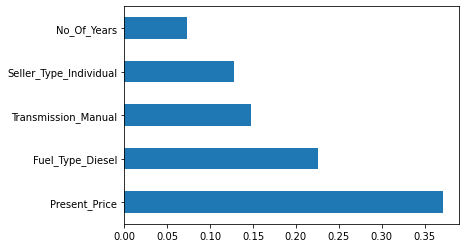

In [26]:
feature_imp.nlargest(5).plot(kind='barh')
plt.show()

# Train Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 61, 240, 61)

In [29]:
type(X_train)

pandas.core.frame.DataFrame

In [30]:
X_train.head(2)

,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
184,0.75,26000,1,13,0,1,1,1
132,0.95,3500,0,4,0,1,1,1


In [31]:
X_test.head(2)

,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
177,0.57,24000,0,5,0,1,1,0
289,13.60,10980,0,5,0,1,0,1


# Hyper-parameter Tuning

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rfr = RandomForestRegressor()
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
n_estimators = [int(x) for x in np.linspace(100, 1200, 12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [35]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, 6)]
min_samples_split = [2,5, 10, 15, 50, 75, 100]
min_samples_leaf = [1, 2, 5, 10]

## Find best params. using RandomizedSearchCV

In [36]:
random_grid = {
    'n_estimators' : n_estimators, 
               'max_features' : max_features, 
               'max_depth' : max_depth, 
               'min_samples_split' : min_samples_split, 
               'min_samples_leaf' : min_samples_leaf
}

In [73]:
?RandomizedSearchCV

Init signature:
RandomizedSearchCV(
    estimator,
    param_distributions,
    *,
    n_iter=10,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    random_state=None,
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Randomized search on hyper parameters.

RandomizedSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but
rather a fixed number of parameter settings is sampled from the specified
distributions. The number of parameter settings that are tried is
given by n_iter.

If all parameters are presented as a list,
sampling without replacement is p

Ref : 
https://stackoverflow.com/questions/48244219/is-sklearn-metrics-mean-squared-error-the-larger-the-better-negated

In [37]:
rf_random = RandomizedSearchCV(estimator=rfr, 
                  param_distributions = random_grid, 
                  scoring = 'neg_mean_squared_error', 
                  cv=5, 
                  random_state=42, 
                  n_jobs=-1, 
                  verbose=2)

In [38]:
X_train.values

array([[7.5000e-01, 2.6000e+04, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [9.5000e-01, 3.5000e+03, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [7.8700e-01, 5.0000e+04, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       ...,
       [3.4500e+00, 1.6500e+04, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+01, 6.9341e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.7800e+00, 4.0000e+03, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]])

In [39]:
type(y_train)

pandas.core.series.Series

In [40]:
rf_random.fit(X_train.values, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50,
                                                              75, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10}

In [42]:
type(rf_random.cv_results_)

dict

In [99]:
df_cv_results = pd.DataFrame(data=rf_random.cv_results_)
df_cv_results.shape

(10, 18)

In [101]:
df_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.659179,1.040745,0.281771,0.108137,700,75,2,sqrt,25,"{'n_estimators': 700, 'min_samples_split': 75,...",-11.867603,-19.009838,-5.194607,-14.580426,-5.729597,-11.276414,5.269296,9
1,1.903241,0.708497,0.122237,0.048895,400,75,2,auto,30,"{'n_estimators': 400, 'min_samples_split': 75,...",-6.055520,-12.424537,-5.819358,-9.889110,-7.656800,-8.369065,2.494722,5
2,4.665979,1.634396,0.358609,0.127120,900,5,5,auto,10,"{'n_estimators': 900, 'min_samples_split': 5, ...",-3.616304,-7.873309,-5.158746,-5.957903,-3.377109,-5.196674,1.646431,1
3,6.928115,1.712082,0.417027,0.153923,1100,10,10,sqrt,10,"{'n_estimators': 1100, 'min_samples_split': 10...",-10.020823,-16.387386,-3.743681,-12.131331,-3.293596,-9.115363,5.010912,7
4,1.242091,0.357672,0.071004,0.005550,300,15,2,sqrt,10,"{'n_estimators': 300, 'min_samples_split': 15,...",-6.852484,-13.608738,-2.273741,-8.002669,-1.854262,-6.518379,4.297880,3
5,1.879179,0.713870,0.134099,0.053446,400,2,2,sqrt,10,"{'n_estimators': 400, 'min_samples_split': 2, ...",-6.020085,-12.604864,-1.182563,-5.386456,-1.377329,-5.314259,4.152750,2
6,2.415823,1.036791,0.174492,0.088888,500,100,1,sqrt,30,"{'n_estimators': 500, 'min_samples_split': 100...",-13.917674,-21.360351,-6.136286,-15.903223,-6.948016,-12.853110,5.706058,10
7,4.698902,1.447304,0.312606,0.110751,900,75,1,sqrt,25,"{'n_estimators': 900, 'min_samples_split': 75,...",-11.625340,-18.617755,-5.286959,-14.641483,-5.546874,-11.143682,5.175980,8
8,3.440066,1.392014,0.188803,0.063997,700,15,10,auto,15,"{'n_estimators': 700, 'min_samples_split': 15,...",-6.714217,-11.586355,-6.685479,-9.273215,-2.276338,-7.307121,3.105612,4
9,3.614214,0.585701,0.188110,0.030065,1000,75,2,auto,20,"{'n_estimators': 1000, 'min_samples_split': 75...",-6.297461,-12.628910,-6.091967,-10.076848,-7.818146,-8.582666,2.474466,6


### Both best params. are same

In [110]:
rf_random.cv_results_['params'][rf_random.best_index_]

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10}

In [43]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10}

### Loop over the cv_results Dict. object

In [ ]:
for items in rf_random.cv_results_.items():
    print(f'{items[0]} : {items[1]}')
    print('\b')

mean_fit_time : [3.65917902 1.90324073 4.66597857 6.92811546 1.24209118 1.87917933
 2.41582317 4.69890218 3.44006553 3.61421351]

std_fit_time : [1.04074546 0.70849666 1.63439602 1.71208206 0.35767219 0.71386958
 1.03679109 1.44730436 1.39201356 0.58570108]

mean_score_time : [0.28177099 0.12223678 0.35860944 0.41702652 0.0710042  0.13409944
 0.17449188 0.31260619 0.18880324 0.18810997]

std_score_time : [0.10813745 0.0488949  0.12711958 0.15392279 0.00555005 0.05344578
 0.08888757 0.11075089 0.06399658 0.03006513]

param_n_estimators : [700 400 900 1100 300 400 500 900 700 1000]

param_min_samples_split : [75 75 5 10 15 2 100 75 15 75]

param_min_samples_leaf : [2 2 5 10 2 2 1 1 10 2]

param_max_features : ['sqrt' 'auto' 'auto' 'sqrt' 'sqrt' 'sqrt' 'sqrt' 'sqrt' 'auto' 'auto']

param_max_depth : [25 30 10 10 10 10 30 25 15 20]

params : [{'n_estimators': 700, 'min_samples_split': 75, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 25}, {'n_estimators': 400, 'min_s

# Predict

In [45]:
predictions = rf_random.predict(X_test.values)
predictions

array([ 0.38220885, 11.18496759,  4.72860504,  0.24663054,  7.31137495,
        6.49932793,  1.09107132,  0.60340648,  0.43183659,  6.25066974,
        7.82608139,  0.9914457 ,  7.94777119,  0.44132247,  5.17968794,
        2.74441919,  1.12077766, 11.85959796,  0.44037312,  1.30150921,
        0.32183576,  7.63803079,  4.73076992,  2.71943036,  0.5168476 ,
        3.80098088,  5.26823227,  3.2789729 ,  1.1964112 ,  1.16614757,
        0.38087258,  9.66018363,  0.44863192,  2.91663482,  7.75467039,
        4.46505945,  6.03820315,  6.26844547,  2.6804534 ,  6.64259008,
        5.45153694,  4.19586605,  5.00389899,  0.51500405,  6.36935132,
        0.78558297,  9.17168669,  8.63616927,  2.91244089,  3.76189067,
        5.15827396,  1.22180556, 21.38851803, 19.8165442 ,  6.68971392,
       10.54852083,  5.06364467,  8.76914339,  2.96802291,  7.11539481,
        0.25692834])

In [46]:
y_test - predictions

177   -0.032209
289   -1.074968
228    0.221395
198   -0.096631
60    -0.361375
         ...   
234    0.436355
296    0.730857
281   -0.868023
285    0.284605
182    0.043072
Name: Selling_Price, Length: 61, dtype: float64

C:\Users\595244\Anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

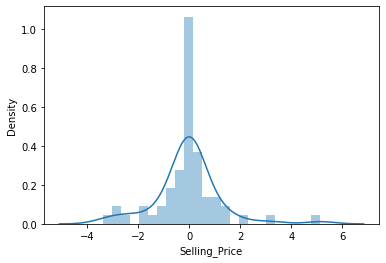

In [47]:
sns.distplot(y_test  - predictions)

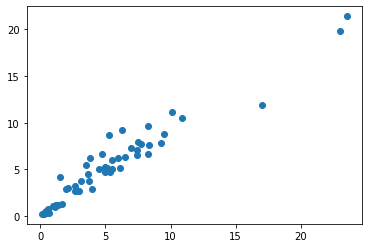

In [48]:
plt.scatter(y_test, predictions)

# Save the Model

In [118]:
model_name = 'rf_car_prediction.pkl'
file = open(model_name, 'wb')
pickle.dump(rf_random, file)